### Created by Julia Drygalska

Loading predictions from both models...
Predictions loaded successfully.
Calculating evaluation metrics for Gradient Boosting model...
Gradient Boosting Model - Mean Squared Error: 23889596464.447803
Gradient Boosting Model - R² Score: 0.5357303620661515
Gradient Boosting Model - Mean Absolute Error: 89498.78186036696
Calculating evaluation metrics for PyCaret model...
PyCaret Model - Mean Squared Error: 29782825629.30385
PyCaret Model - R² Score: 0.4212015388312901
PyCaret Model - Mean Absolute Error: 91685.27134709203
Aggregating data for visualization...


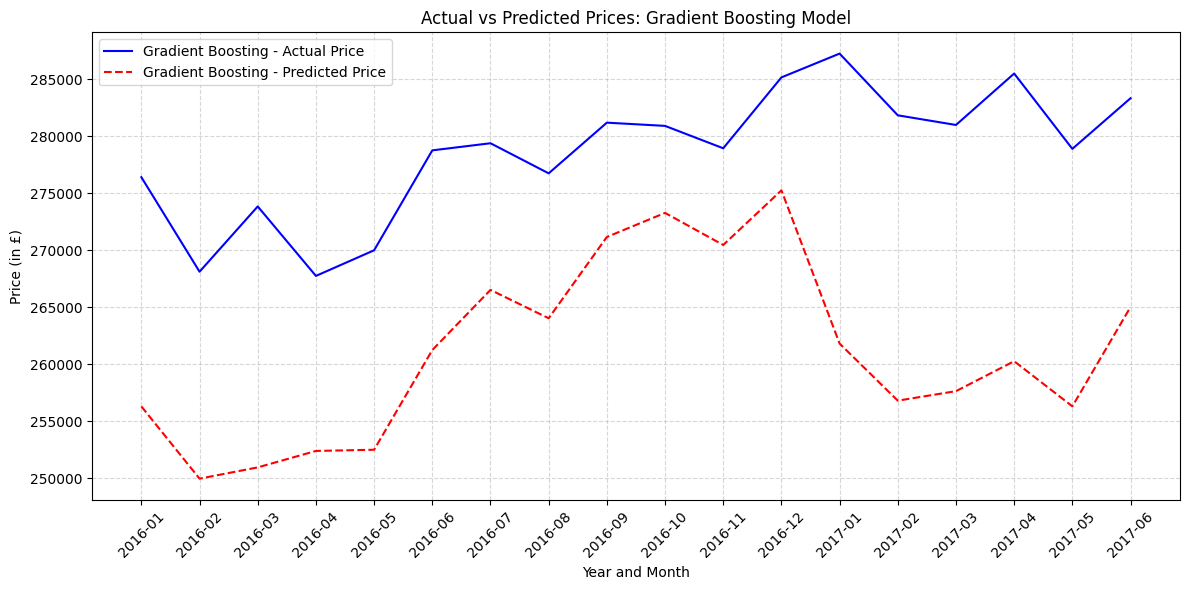

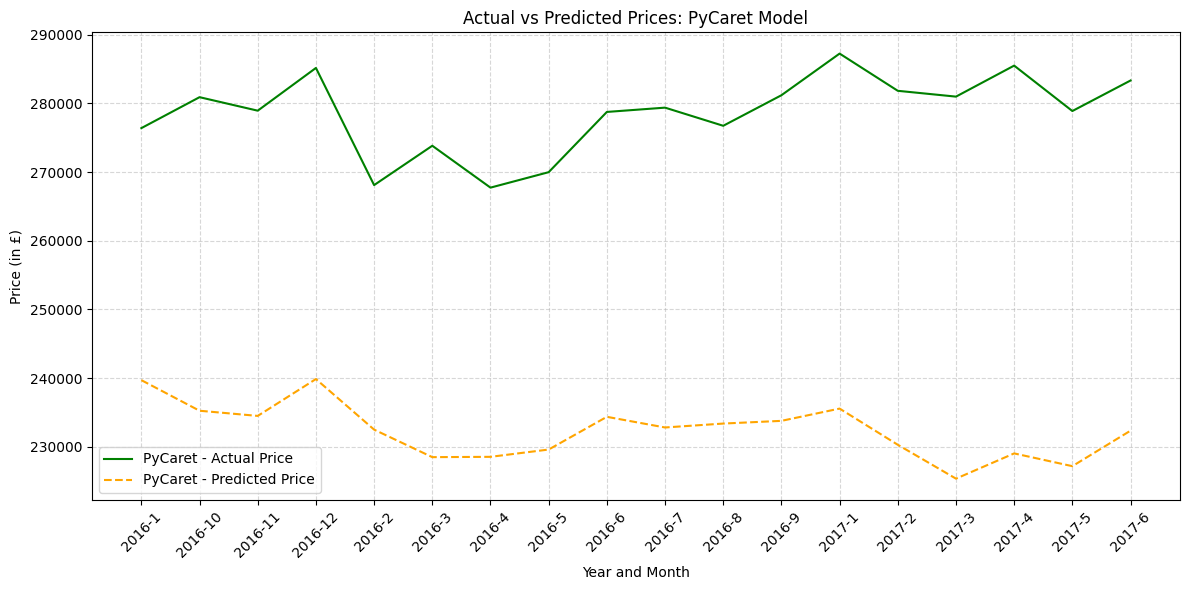

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load predictions from both models
print("Loading predictions from both models...")
predictions_gradient = pd.read_csv('./datasets/predictions_gradient_boosting.csv')
predictions_pycaret = pd.read_csv('./datasets/predictions_pycaret.csv')
print("Predictions loaded successfully.")

# Ensure predictions DataFrame have matching columns for comparison
predictions_gradient['year_month'] = predictions_gradient['date_of_transfer'].str[:7]
predictions_pycaret['year_month'] = predictions_pycaret['year'].astype(str) + '-' + predictions_pycaret['month'].astype(str)

# Calculate mean squared error, r2 score, and mean absolute error for both models
print("Calculating evaluation metrics for Gradient Boosting model...")
mse_gradient = mean_squared_error(predictions_gradient['Actual'], predictions_gradient['Predicted'])
r2_gradient = r2_score(predictions_gradient['Actual'], predictions_gradient['Predicted'])
mae_gradient = mean_absolute_error(predictions_gradient['Actual'], predictions_gradient['Predicted'])
print(f"Gradient Boosting Model - Mean Squared Error: {mse_gradient}")
print(f"Gradient Boosting Model - R² Score: {r2_gradient}")
print(f"Gradient Boosting Model - Mean Absolute Error: {mae_gradient}")

print("Calculating evaluation metrics for PyCaret model...")
mse_pycaret = mean_squared_error(predictions_pycaret['price'], predictions_pycaret['Label' if 'Label' in predictions_pycaret.columns else 'prediction_label'])
r2_pycaret = r2_score(predictions_pycaret['price'], predictions_pycaret['Label' if 'Label' in predictions_pycaret.columns else 'prediction_label'])
mae_pycaret = mean_absolute_error(predictions_pycaret['price'], predictions_pycaret['Label' if 'Label' in predictions_pycaret.columns else 'prediction_label'])
print(f"PyCaret Model - Mean Squared Error: {mse_pycaret}")
print(f"PyCaret Model - R² Score: {r2_pycaret}")
print(f"PyCaret Model - Mean Absolute Error: {mae_pycaret}")

# Aggregate data for visualization by year and month
print("Aggregating data for visualization...")
predictions_gradient_grouped = predictions_gradient.groupby('year_month').agg({'Actual': 'mean', 'Predicted': 'mean'}).reset_index()
predictions_pycaret_grouped = predictions_pycaret.groupby('year_month').agg({'price': 'mean', 'Label' if 'Label' in predictions_pycaret.columns else 'prediction_label': 'mean'}).reset_index()

# Plot the actual vs predicted prices from Gradient Boosting model
plt.figure(figsize=(12, 6))
plt.plot(predictions_gradient_grouped['year_month'], predictions_gradient_grouped['Actual'], label='Gradient Boosting - Actual Price', color='blue')
plt.plot(predictions_gradient_grouped['year_month'], predictions_gradient_grouped['Predicted'], label='Gradient Boosting - Predicted Price', color='red', linestyle='--')

# Chart details for Gradient Boosting
plt.xlabel('Year and Month')
plt.ylabel('Price (in £)')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted Prices: Gradient Boosting Model')
plt.legend()
plt.tight_layout()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plot the actual vs predicted prices from PyCaret model
plt.figure(figsize=(12, 6))
plt.plot(predictions_pycaret_grouped['year_month'], predictions_pycaret_grouped['price'], label='PyCaret - Actual Price', color='green')
plt.plot(predictions_pycaret_grouped['year_month'], predictions_pycaret_grouped['Label' if 'Label' in predictions_pycaret.columns else 'prediction_label'], label='PyCaret - Predicted Price', color='orange', linestyle='--')

# Chart details for PyCaret
plt.xlabel('Year and Month')
plt.ylabel('Price (in £)')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted Prices: PyCaret Model')
plt.legend()
plt.tight_layout()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()



### MSE Comparision
##### The Gradient boosting model has a lower MSE, which indicates that its predictions are closer to actual values.
### MAE Comparision
##### This scores show us that Gradient Boosting model performs a little better and its predictiones are more accurate.
### R² Score Comparison
##### Gradient Boosting model has higher score which shows that it is better at explaining variability of the price variable.
### Charts
##### From the charts we can see that both models are not exactly close to the actual data, however Gradient Boosting model captures the overall trend better. 